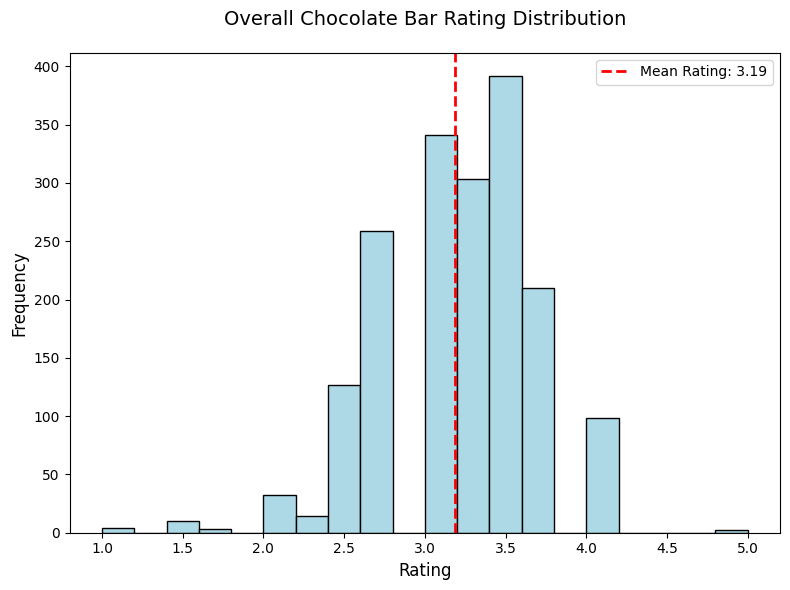

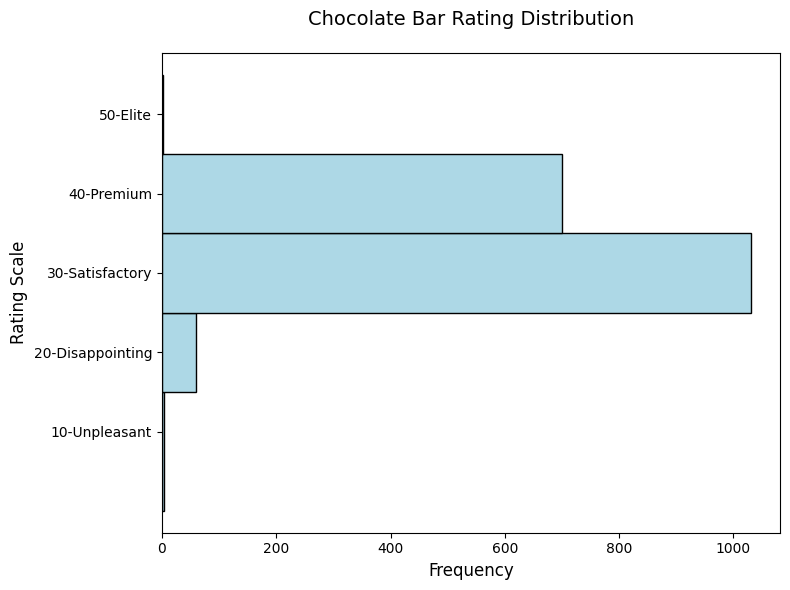

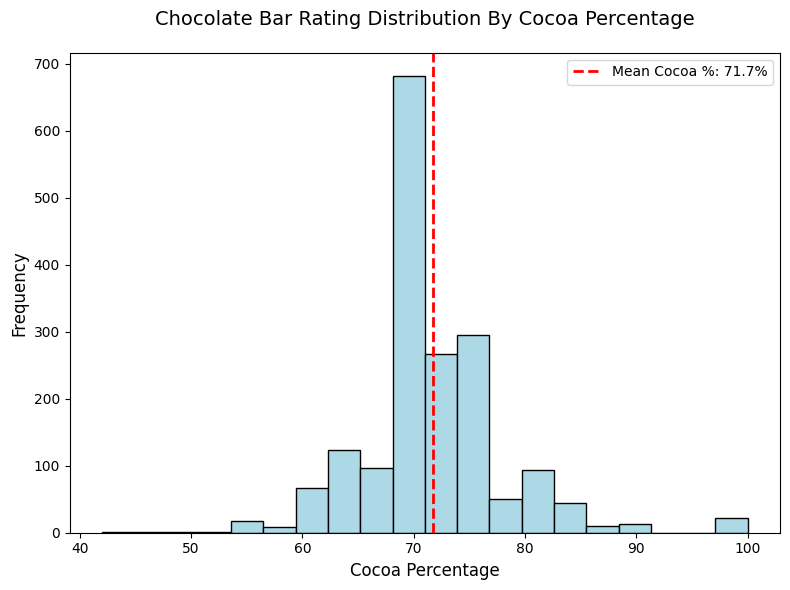

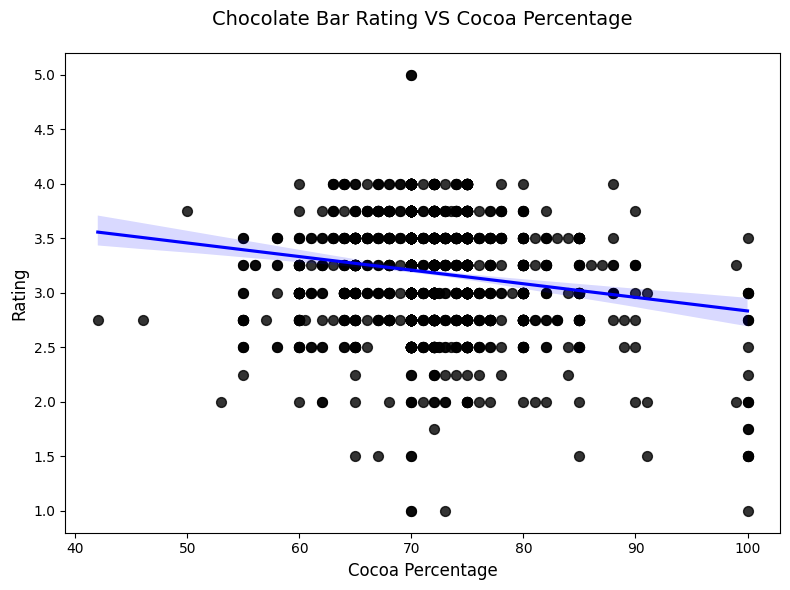

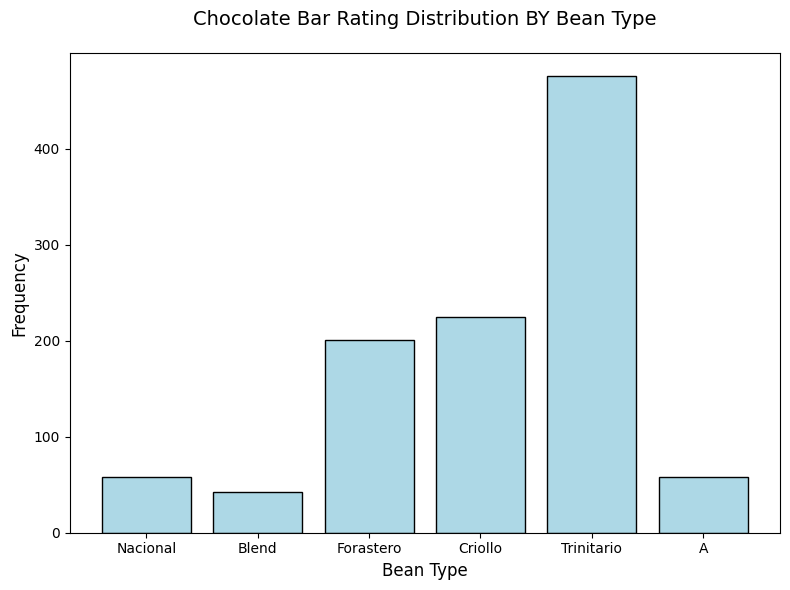

/var/folders/b0/0b7cngjj4mxg1v11wr4dz2tw0000gn/T/ipykernel_21279/3518206580.py:82: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(bean_data, labels=bean_types, patch_artist=True,


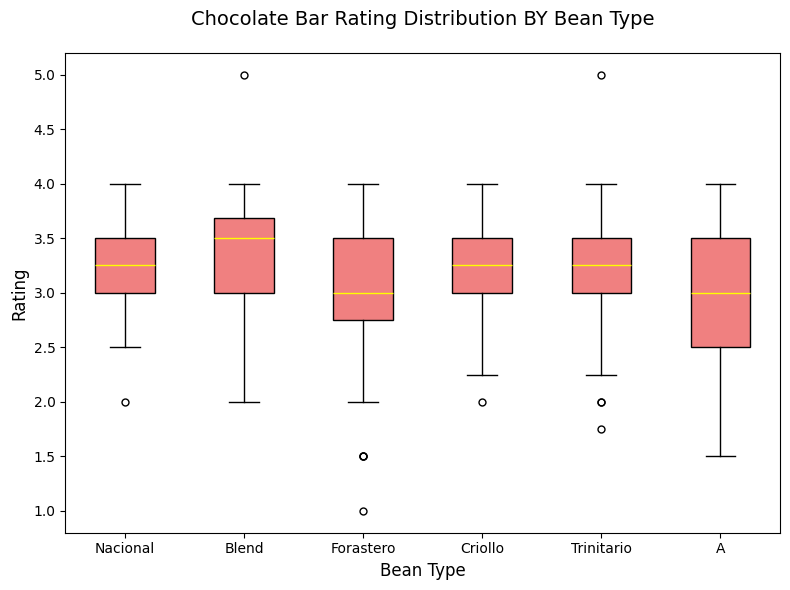

Columns in world GeoDataFrame: Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


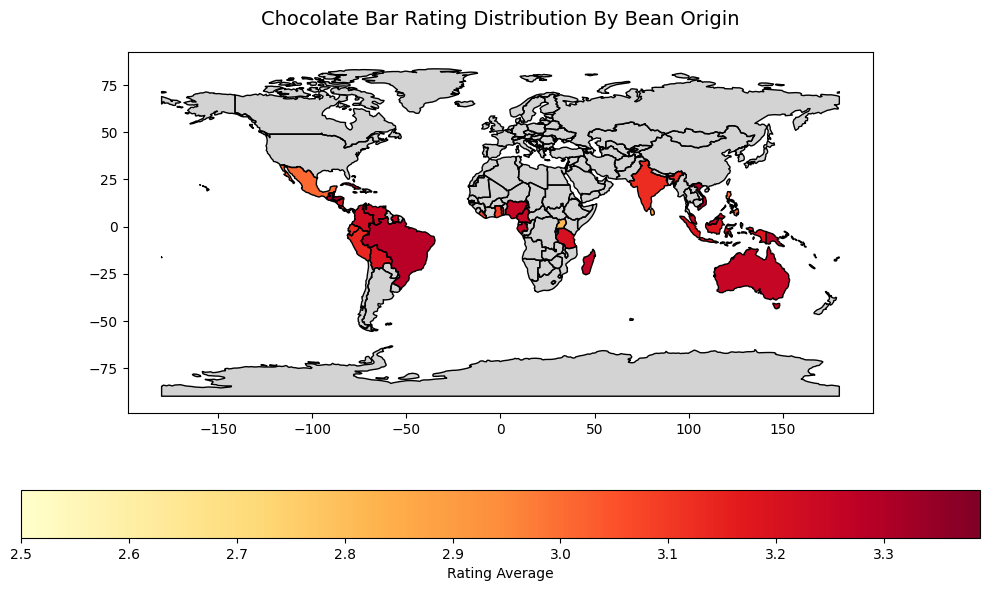

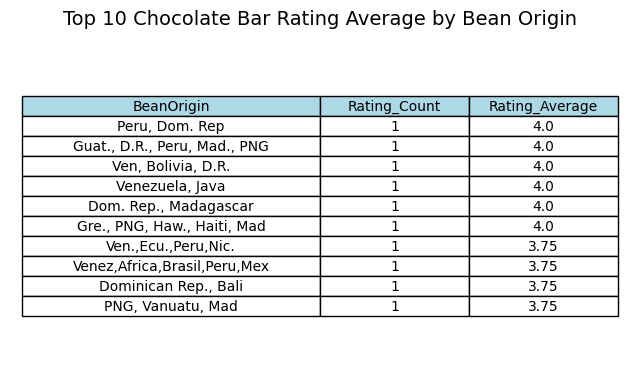

/var/folders/b0/0b7cngjj4mxg1v11wr4dz2tw0000gn/T/ipykernel_21279/3518206580.py:156: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(year_data, labels=review_years, patch_artist=True,


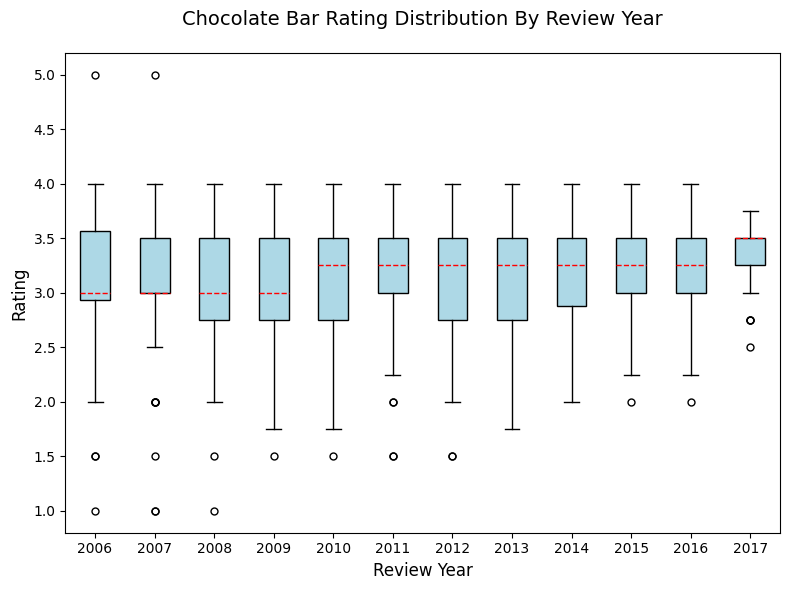

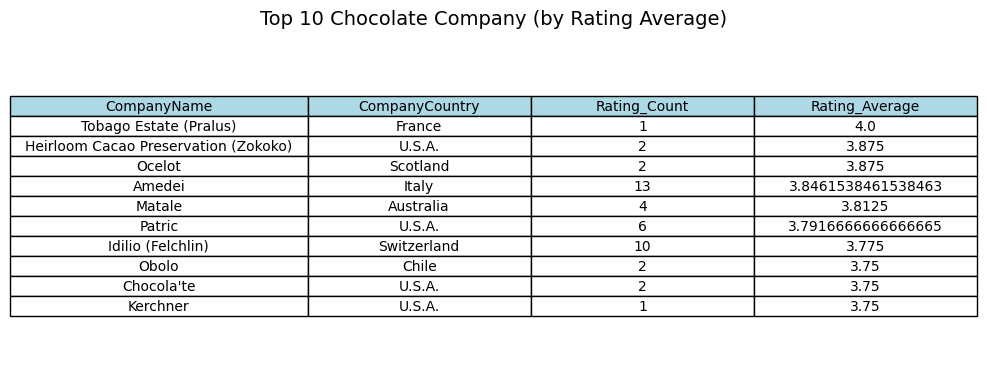

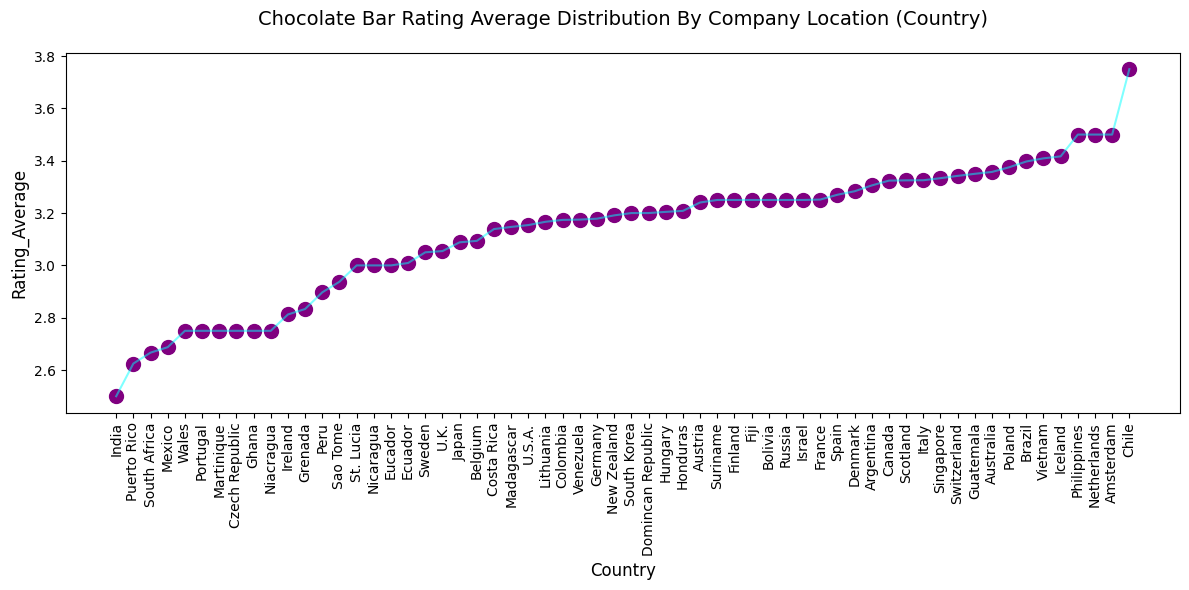

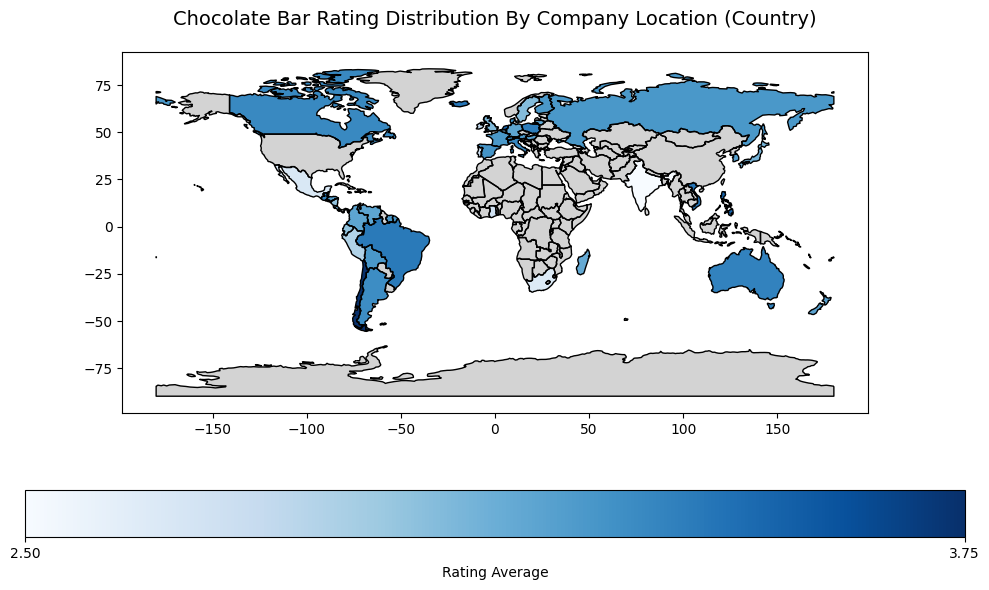

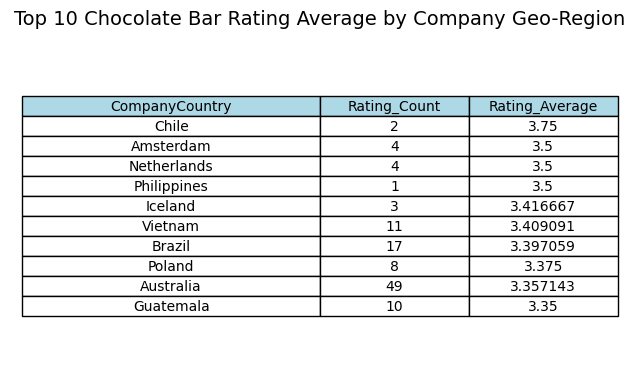

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import numpy as np

data = pd.read_csv('/Users/anantraj/Desktop/flavors_of_cacao.csv')  

data.columns = data.columns.str.replace(r'\s+', ' ', regex=True).str.strip()

data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')
data['Cocoa Percent'] = data['Cocoa Percent'].str.replace('%', '').astype(float)
data['Review Date'] = pd.to_numeric(data['Review Date'], errors='coerce')

data['Bean Type'] = data['Bean Type'].replace('\xa0', 'Unknown').fillna('Unknown')
data['Broad Bean Origin'] = data['Broad Bean Origin'].replace('\xa0', 'Unknown').fillna('Unknown')

plt.figure(figsize=(8, 6))  
plt.hist(data['Rating'], bins=20, color='lightblue', edgecolor='black')  
mean_rating = data['Rating'].mean()
plt.axvline(mean_rating, color='red', linestyle='dashed', linewidth=2, label=f'Mean Rating: {mean_rating:.2f}')

plt.title('Overall Chocolate Bar Rating Distribution', fontsize=14, pad=20)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


# FIG 2: Histogram of Chocolate Bar Rating Classes
plt.figure(figsize=(8, 6))
data['Rating_Scaled'] = data['Rating'] * 10  
bins = [0, 15, 25, 35, 45, 55]
labels = ['10-Unpleasant', '20-Disappointing', '30-Satisfactory', '40-Premium', '50-Elite']
plt.hist(data['Rating_Scaled'], bins=bins, color='lightblue', edgecolor='black', orientation='horizontal')
plt.yticks(ticks=[10, 20, 30, 40, 50], labels=labels)
plt.title('Chocolate Bar Rating Distribution', fontsize=14, pad=20)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Rating Scale', fontsize=12)
plt.tight_layout()
plt.show()

# FIG 3: Histogram of Chocolate Bar Rating Distribution by Cocoa Percentage
plt.figure(figsize=(8, 6))
plt.hist(data['Cocoa Percent'], bins=20, color='lightblue', edgecolor='black')
mean_cocoa = data['Cocoa Percent'].mean()
plt.axvline(mean_cocoa, color='red', linestyle='dashed', linewidth=2, label=f'Mean Cocoa %: {mean_cocoa:.1f}%')
plt.title('Chocolate Bar Rating Distribution By Cocoa Percentage', fontsize=14, pad=20)
plt.xlabel('Cocoa Percentage', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# FIG 4: Scatter Plot of Chocolate Bar Rating vs Cocoa Percentage with Regression Line
plt.figure(figsize=(8, 6))
sns.regplot(x='Cocoa Percent', y='Rating', data=data, 
            scatter_kws={'s': 50, 'color': 'black'}, 
            line_kws={'color': 'blue'})
plt.title('Chocolate Bar Rating VS Cocoa Percentage', fontsize=14, pad=20)
plt.xlabel('Cocoa Percentage', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.tight_layout()
plt.show()

# FIG 5: Histogram of Chocolate Bar Rating Distribution by Bean Type (Frequency)
plt.figure(figsize=(8, 6))
bean_types = ['Nacional', 'Blend', 'Forastero', 'Criollo', 'Trinitario','A']
bean_counts = [len(data[data['Bean Type'].str.contains(bt, na=False)]) for bt in bean_types]
plt.bar(bean_types, bean_counts, color='lightblue', edgecolor='black')
plt.title('Chocolate Bar Rating Distribution BY Bean Type', fontsize=14, pad=20)
plt.xlabel('Bean Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

# FIG 6: Box Plot of Chocolate Bar Rating Distribution by Bean Type
plt.figure(figsize=(8, 6))
bean_types = ['Nacional', 'Blend', 'Forastero', 'Criollo', 'Trinitario','A']
bean_data = [data[data['Bean Type'].str.contains(bt, na=False)]['Rating'].dropna() for bt in bean_types]
plt.boxplot(bean_data, labels=bean_types, patch_artist=True, 
            boxprops=dict(facecolor='lightcoral', color='black'),
            medianprops=dict(color='yellow'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(marker='o', color='yellow', markersize=5))
plt.title('Chocolate Bar Rating Distribution BY Bean Type', fontsize=14, pad=20)
plt.xlabel('Bean Type', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.tight_layout()
plt.show()

# FIG 7: World Map of Chocolate Bar Rating Average by Bean Origin
world = gpd.read_file('/Users/anantraj/Desktop/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')  

print("Columns in world GeoDataFrame:", world.columns)

bean_origin_ratings = data.groupby('Broad Bean Origin')['Rating'].mean().reset_index()
bean_origin_ratings.columns = ['NAME', 'Rating_Average'] 

bean_origin_ratings['NAME'] = bean_origin_ratings['NAME'].replace({
    'Venezuela': 'Venezuela',
    'Brazil': 'Brazil',
    'Madagascar': 'Madagascar',
    'Vietnam': 'Vietnam',
    'Papua New Guinea': 'Papua New Guinea',
    'Guatemala': 'Guatemala',
    'Honduras': 'Honduras',
    'Cuba': 'Cuba',
    'Belize': 'Belize',
    'Congo': 'Dem. Rep. of the Congo'  
})

world = world.merge(bean_origin_ratings, on='NAME', how='left')

fig, ax = plt.subplots(figsize=(10, 6))
world.boundary.plot(ax=ax, linewidth=1, color='black')
world.plot(column='Rating_Average', ax=ax, legend=True, cmap='YlOrRd', 
           missing_kwds={'color': 'lightgrey'},
           legend_kwds={'label': "Rating Average", 'orientation': "horizontal"})
plt.title('Chocolate Bar Rating Distribution By Bean Origin', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# FIG 8: Table of Top 10 Chocolate Bar Rating Average by Bean Origin
bean_origin_summary = data.groupby('Broad Bean Origin').agg({
    'Rating': ['count', 'mean']
}).reset_index()
bean_origin_summary.columns = ['BeanOrigin', 'Rating_Count', 'Rating_Average']
bean_origin_summary = bean_origin_summary.sort_values(by='Rating_Average', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')  

table_data = bean_origin_summary.values
table = ax.table(cellText=table_data,
                 colLabels=['BeanOrigin', 'Rating_Count', 'Rating_Average'],
                 cellLoc='center',
                 loc='center',
                 colColours=['lightblue']*3,  
                 colWidths=[0.4, 0.2, 0.2])  

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  

plt.title('Top 10 Chocolate Bar Rating Average by Bean Origin', fontsize=14, pad=20)

plt.show()

# FIG 9: Box Plot of Chocolate Bar Rating Distribution by Review Year
plt.figure(figsize=(8, 6))
review_years = sorted(data['Review Date'].dropna().unique())
year_data = [data[data['Review Date'] == year]['Rating'].dropna() for year in review_years]
plt.boxplot(year_data, labels=review_years, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='black'),
            medianprops=dict(color='red', linestyle='--'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(marker='o', color='red', markersize=5))
plt.title('Chocolate Bar Rating Distribution By Review Year', fontsize=14, pad=20)
plt.xlabel('Review Year', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.tight_layout()
plt.show()

# FIG 10: Table of Top 10 Chocolate Companies by Rating Average
company_summary = data.groupby(['Company (Maker-if known)', 'Company Location']).agg({
    'Rating': ['count', 'mean']
}).reset_index()
company_summary.columns = ['CompanyName', 'CompanyCountry', 'Rating_Count', 'Rating_Average']
company_summary = company_summary.sort_values(by='Rating_Average', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')  

table_data = company_summary.values
table = ax.table(cellText=table_data,
                 colLabels=['CompanyName', 'CompanyCountry', 'Rating_Count', 'Rating_Average'],
                 cellLoc='center',
                 loc='center',
                 colColours=['lightblue']*4,  
                 colWidths=[0.4, 0.3, 0.3, 0.3])  

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  
plt.title('Top 10 Chocolate Company (by Rating Average)', fontsize=14, pad=20)

plt.show()

# FIG 11: Scatter Plot of Chocolate Bar Rating Average by Company Location (Country)
company_location_ratings = data.groupby('Company Location')['Rating'].mean().reset_index()
company_location_ratings = company_location_ratings.sort_values(by='Rating')
plt.figure(figsize=(12, 6))
plt.scatter(company_location_ratings['Company Location'], company_location_ratings['Rating'], 
            color='purple', s=100)
plt.plot(company_location_ratings['Company Location'], company_location_ratings['Rating'], 
         color='cyan', linestyle='-', alpha=0.5)
plt.xticks(rotation=90)
plt.title('Chocolate Bar Rating Average Distribution By Company Location (Country)', fontsize=14, pad=20)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Rating_Average', fontsize=12)
plt.tight_layout()
plt.show()

# FIG 12: World Map of Chocolate Bar Rating Average by Company Location (Country)
company_location_ratings = data.groupby('Company Location')['Rating'].mean().reset_index()
company_location_ratings.columns = ['NAME', 'Rating_Average']  

company_location_ratings['NAME'] = company_location_ratings['NAME'].replace({
    'U.S.A.': 'United States',
    'U.K.': 'United Kingdom',
    'Vietnam': 'Vietnam',
    'Brazil': 'Brazil',
    'Australia': 'Australia',
    'Guatemala': 'Guatemala',
    'Switzerland': 'Switzerland',
    'Italy': 'Italy',
    'Scotland': 'United Kingdom',
    'Canada': 'Canada',
    'Denmark': 'Denmark',
    'Spain': 'Spain',
    'India': 'India',
    'Russia': 'Russia',
    'South Africa': 'South Africa'
})

world = gpd.read_file('/Users/anantraj/Desktop/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')  

world = world.merge(company_location_ratings, on='NAME', how='left')

fig, ax = plt.subplots(figsize=(10, 6))
world.boundary.plot(ax=ax, linewidth=1, color='black')
world.plot(column='Rating_Average', ax=ax, legend=True, cmap='Blues', 
           missing_kwds={'color': 'lightgrey'},
           legend_kwds={'label': "Rating Average", 'orientation': "horizontal", 'ticks': [2.5, 3.75]},
           vmin=2.5, vmax=3.75)
plt.title('Chocolate Bar Rating Distribution By Company Location (Country)', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# FIG 13: Table of Top 10 Chocolate Bar Rating Average by Company Geo-Region
company_geo_summary = data.groupby('Company Location').agg({
    'Rating': ['count', 'mean']
}).reset_index()
company_geo_summary.columns = ['CompanyCountry', 'Rating_Count', 'Rating_Average']
company_geo_summary['Rating_Average'] = company_geo_summary['Rating_Average'].round(6)
company_geo_summary = company_geo_summary.sort_values(by='Rating_Average', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')  

table_data = company_geo_summary.values
table = ax.table(cellText=table_data,
                 colLabels=['CompanyCountry', 'Rating_Count', 'Rating_Average'],
                 cellLoc='center',
                 loc='center',
                 colColours=['lightblue']*3,  
                 colWidths=[0.4, 0.2, 0.2])  

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  
plt.title('Top 10 Chocolate Bar Rating Average by Company Geo-Region', fontsize=14, pad=20)
plt.show()